In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

2023-10-14 19:54:07.012689: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-14 19:54:09.230735: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Import libraries

In [2]:
new_data = np.load('nodule_images_updated_3.npy')
new_data_label = np.load('malignancy_scores_updated_3.npy')

Load image data from the numpy arrays

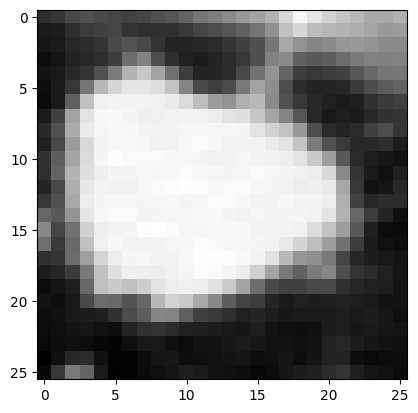

In [3]:
nodule = new_data[1, :, :]
nodule = np.reshape(nodule, (26,26))
from matplotlib import pyplot as plt
plt.imshow(nodule, cmap='gray')
plt.show()

Visualise a nodule by changing the number in the nodule function

In [4]:
new_data = new_data.reshape(new_data.shape[0], 26, 26, 1)
converted_array = np.where(new_data_label == 1, 0, 1)

Reshape the image data so that the colour channel is included in the arrays.
The images are in greyscale so therefore only one colour channel is used.

In [5]:
newTrain, newTest, newLabelTrain, newLabelTest = train_test_split(new_data, converted_array, test_size=0.2)

Split data into training and testing sets

In [6]:
model = Sequential()

model.add(Conv2D(64, (3,3), 1, activation = 'relu', input_shape=(26,26,1))) #input shape is 28 by 28 as the provided iamges are 28 by 28 pixels
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

2023-10-14 19:54:13.681759: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-14 19:54:14.816730: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-14 19:54:14.817177: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-14 19:54:14.821639: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-14 19:54:14.822003: I tensorflow/compile

Model Building

In [7]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Add optimiser parameter (using Adam optimsier)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

Summary of model that has been built

In [9]:
hist = model.fit(newTrain, newLabelTrain, epochs = 25, validation_data = (newTest,newLabelTest))

Epoch 1/25


2023-10-14 19:55:02.256657: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-14 19:55:12.578094: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff40afcc550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-14 19:55:12.578167: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1070 Ti, Compute Capability 6.1
2023-10-14 19:55:12.648752: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-14 19:55:13.345032: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


88/88 [==============================] - 38s 71ms/step - loss: 0.6050 - accuracy: 0.6376 - val_loss: 0.5972 - val_accuracy: 0.6743
Epoch 2/25
88/88 [==============================] - 3s 31ms/step - loss: 0.5509 - accuracy: 0.7041 - val_loss: 0.5741 - val_accuracy: 0.7014
Epoch 3/25
88/88 [==============================] - 3s 31ms/step - loss: 0.5221 - accuracy: 0.7373 - val_loss: 0.5647 - val_accuracy: 0.7186
Epoch 4/25
88/88 [==============================] - 3s 29ms/step - loss: 0.5043 - accuracy: 0.7452 - val_loss: 0.5445 - val_accuracy: 0.6771
Epoch 5/25
88/88 [==============================] - 2s 26ms/step - loss: 0.4681 - accuracy: 0.7806 - val_loss: 0.4765 - val_accuracy: 0.7829
Epoch 6/25
88/88 [==============================] - 2s 26ms/step - loss: 0.4215 - accuracy: 0.8063 - val_loss: 0.4238 - val_accuracy: 0.8114
Epoch 7/25
88/88 [==============================] - 2s 27ms/step - loss: 0.3964 - accuracy: 0.8234 - val_loss: 0.4365 - val_accuracy: 0.8114
Epoch 8/25
88/88 [=====

Fitting the model using the validation data

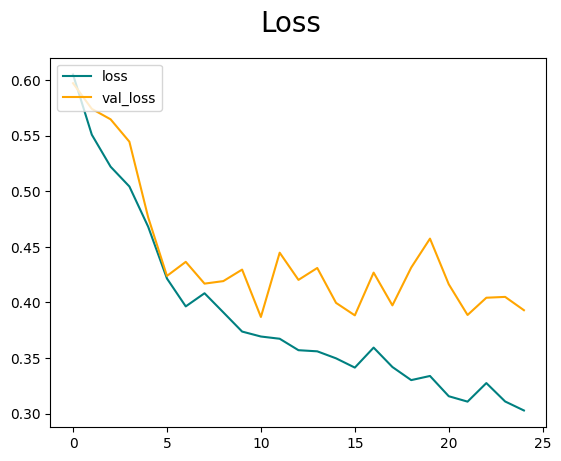

In [10]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting the loss function and validation loss of the model

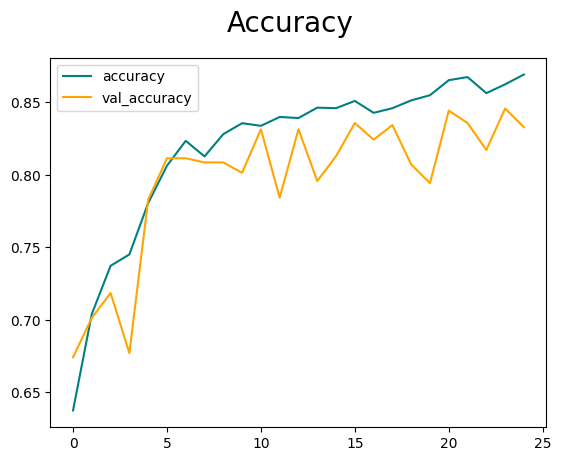

In [11]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig2.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting the accuracy and validation accuracy of the model